In [1]:
import pandas as pd
import icartt
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [16]:
filepath = 'C:/Users/cphal/OneDrive/Desktop/Aerosols/Module C/Input/'
filename = 'ACTIVATE-LARGE-OPTICAL_HU25_20220618_R2.ict'

ict = icartt.Dataset(filepath + filename)

# list variable names
varnames = [x for x in ict.variables]

df = ict.data[:]
df = pd.DataFrame(df, columns = varnames)
df.head()

,Time_Mid,Sc550_submicron_amb,Sc450_submicron,Sc550_submicron,Sc700_submicron,RH_Sc_submicron,Abs470_total,Abs532_total,Abs660_total,Ext532_submicron_amb,...,gamma550,fRH550_RH20to80,AEscatAMB_450to700nm,AEscat_450to700nm,AEabsDRY_470to660nm,SSA_450nm,SSA_550nm,SSA_700nm,SSA_amb_550nm,stdPT
0,43515.0,NaN,6.73,8.57,5.95,51.8,1435.16,1309.42,1114.10,NaN,...,NaN,NaN,0.67,0.41,0.85,0.035,0.038,0.043,0.036,1.087
1,43516.0,7.50,9.18,8.33,7.83,51.9,1691.63,1497.90,1270.05,1505.57,...,-0.33,0.63,0.69,0.42,0.85,0.037,0.040,0.045,0.038,1.087
2,43517.0,NaN,8.85,8.04,7.12,52.1,672.10,548.07,465.83,NaN,...,NaN,NaN,0.67,0.42,0.85,0.039,0.043,0.048,0.041,1.087
3,43518.0,7.44,10.07,7.34,8.18,52.1,36.54,8.13,8.68,15.73,...,0.03,1.05,0.66,0.40,0.85,0.041,0.045,0.051,0.043,1.088
4,43519.0,8.81,9.44,10.45,9.01,52.2,-13.00,-4.11,-2.47,4.89,...,-0.48,0.52,0.66,0.42,0.85,0.044,0.047,0.053,0.045,1.088


In [17]:
opticals = {'scat_blue' : ['totSC450_stdPT','Sc450_total','Scat450tot','drySC450_stdPT','Scat_blue_dry_TSI3563_LARGE'],
            'scat_green' : ['totSC550_stdPT','Sc550_total','Scat550tot','drySC550_stdPT','Scat_green_dry_TSI3563_LARGE'], 
            'scat_red' : ['totSC700_stdPT','Sc700_total','Scat700tot','drySC700_stdPT','Scat_red_dry_TSI3563_LARGE'],
            'abs_blue': ['Abs470_stdPT','Abs470_total','Abs470tot','Abs_blue_dry_PSAP_LARGE'],
            'abs_green' : ['Abs532_stdPT','Abs532_total','Abs532tot','Abs_green_dry_PSAP_LARGE'],
            'abs_red' : ['Abs660_stdPT','Abs660_total','Abs660tot','Abs_red_dry_PSAP_LARGE']
}

SAE_AAE = {'SAE' : ['AEscat_450to700nm','AEscatDRY_450to700nm'],
            'AAE' : ['AEabsDRY_470to660nm'],
            'SSA_red' : ['SSA_700nm','SSA_dry_700nm'],
            'SSA_green' : ['SSA_550nm','SSA_dry_550nm'],
            'SSA_blue' : ['SSA_450nm','SSA_dry_450nm']}

In [18]:
dictionary = opticals

columns_we_want = []
for x in varnames:
    for key in dictionary.keys():
        l = dictionary.get(key)
        for word in l:
            if word == x: 
                columns_we_want.append(key)
                df.rename(columns={word:key},inplace=True)

In [19]:
#reformat date and time
date_time = ict.times
datetimedf = pd.DataFrame(date_time, columns= ['datetime'])
date = str(date_time[0])
date = datetime.datetime.strptime(date, '%Y-%m-%dT%H:%M:%S.%f000').strftime('%Y_%m_%d')
def get_time(datetime):
    date_and_time = pd.to_datetime(datetime)
    x = date_and_time.time()
    return x
def get_date(datetime):
    date_and_time = pd.to_datetime(datetime)
    x = date_and_time.date()
    return x
datetimedf['time'] = datetimedf['datetime'].apply(lambda x: get_time(x))
datetimedf['date'] = datetimedf['datetime'].apply(lambda x: get_date(x))

In [20]:
new_df = datetimedf
new_df[columns_we_want] = df[columns_we_want]
new_df.head()

,datetime,time,date,abs_blue,abs_green,abs_red
0,2022-06-18 12:05:15,12:05:15,2022-06-18,1435.16,1309.42,1114.10
1,2022-06-18 12:05:16,12:05:16,2022-06-18,1691.63,1497.90,1270.05
2,2022-06-18 12:05:17,12:05:17,2022-06-18,672.10,548.07,465.83
3,2022-06-18 12:05:18,12:05:18,2022-06-18,36.54,8.13,8.68
4,2022-06-18 12:05:19,12:05:19,2022-06-18,-13.00,-4.11,-2.47


In [21]:
new_df.describe()

,datetime,abs_blue,abs_green,abs_red
count,11903,11281.000000,11281.000000,11281.000000
mean,2022-06-18 13:44:26,1.866662,1.545177,1.125376
min,2022-06-18 12:05:15,-84.150000,-54.560000,-40.060000
25%,2022-06-18 12:54:50.500000,-0.580000,-0.230000,-0.790000
50%,2022-06-18 13:44:26,1.000000,0.760000,0.500000
75%,2022-06-18 14:34:01.500000,2.840000,1.910000,1.930000
max,2022-06-18 15:23:37,1691.630000,1497.900000,1270.050000
std,NaN,22.451083,19.774518,16.830020


In [8]:
columns_no_date = tuple(columns_we_want)
new_df.loc[new_df['scat_blue']<0, ['scat_blue','scat_green','scat_red']] = -8888 
new_df.loc[new_df['scat_green']<0, ['scat_blue','scat_green','scat_red']] = -8888 
new_df.loc[new_df['scat_red']<0, ['scat_blue','scat_green','scat_red']] = -8888
new_df.loc[new_df['abs_blue']<0, ['abs_blue','abs_green','abs_red']] = -8888 
new_df.loc[new_df['abs_green']<0, ['abs_blue','abs_green','abs_red']] = -8888 
new_df.loc[new_df['abs_red']<0, ['abs_blue','abs_green','abs_red']] = -8888 

In [9]:
new_df.loc[(new_df['scat_blue']<=2) & (new_df['scat_blue'] != -8888), ['scat_blue','scat_green','scat_red']] = -7777 
new_df.loc[(new_df['scat_green']<=2) & (new_df['scat_green'] != -8888), ['scat_blue','scat_green','scat_red']] = -7777 
new_df.loc[(new_df['scat_red']<=2) & (new_df['scat_red'] != -8888), ['scat_blue','scat_green','scat_red']] = -7777
new_df.loc[(new_df['abs_blue']<=2) & (new_df['abs_blue'] != -8888), ['abs_blue','abs_green','abs_red']] = -7777 
new_df.loc[(new_df['abs_green']<=2) & (new_df['abs_green'] != -8888), ['abs_blue','abs_green','abs_red']] = -7777 
new_df.loc[(new_df['abs_red']<=2) & (new_df['abs_red'] != -8888), ['abs_blue','abs_green','abs_red']] = -7777 

In [123]:
len(new_df) - len(new_df[new_df['abs_blue'] == -8888])

17149

In [124]:
len(new_df) - len(new_df[new_df['scat_blue'] == -8888])

17352

In [125]:
len(new_df)

20107

In [126]:
len(new_df[new_df['abs_blue'] == -7777])

12366

In [127]:
cleaned_df = new_df.replace(-8888,np.nan)
cleaned_df = cleaned_df.replace(-7777,np.nan)

In [128]:
cleaned_df.head()

,datetime,time,date,scat_blue,scat_green,scat_red,abs_blue,abs_green,abs_red
0,2016-06-18 16:59:37,16:59:37,2016-06-18,NaN,9.16,5.04,NaN,NaN,NaN
1,2016-06-18 16:59:38,16:59:38,2016-06-18,NaN,8.80,2.49,NaN,NaN,NaN
2,2016-06-18 16:59:39,16:59:39,2016-06-18,NaN,10.86,5.32,NaN,NaN,NaN
3,2016-06-18 16:59:40,16:59:40,2016-06-18,NaN,11.46,10.76,NaN,NaN,NaN
4,2016-06-18 16:59:41,16:59:41,2016-06-18,NaN,13.86,11.31,NaN,NaN,NaN


In [129]:
#calculate SSA
cleaned_df['SSA_red'] = cleaned_df['scat_red'] / (cleaned_df['scat_red'] + cleaned_df['abs_red'])
cleaned_df['SSA_blue'] = cleaned_df['scat_blue'] / (cleaned_df['scat_blue'] + cleaned_df['abs_blue'])
cleaned_df['SSA_green'] = cleaned_df['scat_green'] / (cleaned_df['scat_green'] + cleaned_df['abs_green'])
cleaned_df.describe()

,datetime,scat_blue,scat_green,scat_red,abs_blue,abs_green,abs_red,SSA_red,SSA_blue,SSA_green
count,20107,0.0,12203.000000,12203.000000,0.0,950.000000,950.000000,950.000000,0.0,950.000000
mean,2016-06-18 19:47:10,NaN,26.384021,15.478995,NaN,13.585053,7.915979,0.913841,NaN,0.922752
min,2016-06-18 16:59:37,NaN,2.010000,2.010000,NaN,2.130000,2.010000,0.590090,NaN,0.719470
25%,2016-06-18 18:23:23.500000,NaN,4.720000,3.870000,NaN,5.432500,3.272500,0.902840,NaN,0.912339
50%,2016-06-18 19:47:10,NaN,7.400000,5.830000,NaN,9.360000,5.215000,0.923070,NaN,0.928774
75%,2016-06-18 21:10:56.500000,NaN,15.775000,9.710000,NaN,16.795000,9.440000,0.936500,NaN,0.941044
max,2016-06-18 22:34:43,NaN,1135.440000,640.010000,NaN,65.670000,38.490000,0.965980,NaN,0.966213
std,NaN,NaN,84.818443,46.395015,NaN,12.291562,7.274379,0.036340,NaN,0.027782


In [130]:
sae_aae = cleaned_df[['datetime','SAE','AAE']]
#sae_aae['time'] = datetime.datetime(sae_aae['time'])
sae_aae_mask = sae_aae[sae_aae['SAE'].notna() & sae_aae['AAE'].notna()]
sae_aae_mask.describe()

KeyError: "['SAE', 'AAE'] not in index"

In [ ]:
valid_scat = cleaned_df[['datetime','scat_blue','scat_green','scat_red']]
valid_scat = valid_scat[valid_scat['scat_blue'].notna()]
valid_scat.to_csv('C:/Users/cphal/OneDrive/Desktop/Aerosols/Module C/valid_scat.csv')

In [ ]:
valid_ssa = cleaned_df[['datetime','SSA_red','SSA_green','SSA_blue']]
valid_ssa = valid_ssa[valid_ssa['SSA_red'].notna()]
valid_ssa.to_csv('C:/Users/cphal/OneDrive/Desktop/Aerosols/Module C/valid_ssa.csv')

In [ ]:
cleaned_df[sae_aae['SAE'].notna() & sae_aae['AAE'].notna()].describe()

,datetime,scat_blue,scat_green,scat_red,abs_blue,abs_green,abs_red,SAE,AAE,SSA_blue,SSA_green,SSA_red
count,607,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,599.000000,570.000000
mean,2019-10-05 05:31:05.571663872,133.201351,90.324712,56.766293,9.249374,7.884432,6.693740,2.016474,0.917446,0.903483,0.896918,0.874016
min,2019-10-05 01:31:48,1.610000,0.930000,0.650000,0.030000,0.200000,0.130000,0.140000,0.030000,0.358000,0.476000,0.366000
25%,2019-10-05 01:38:37.500000,59.640000,43.895000,25.350000,3.780000,3.475000,2.990000,2.250000,0.700000,0.876000,0.876500,0.849000
50%,2019-10-05 07:14:56,100.300000,68.070000,40.230000,7.280000,6.260000,5.240000,2.340000,0.920000,0.941000,0.930000,0.904500
75%,2019-10-05 07:23:04.500000,193.525000,128.345000,81.685000,9.645000,8.465000,7.280000,2.450000,1.130000,0.969000,0.959000,0.943000
max,2019-10-05 07:26:14,512.280000,475.850000,438.550000,60.110000,51.080000,44.660000,3.790000,2.040000,0.983000,0.972000,0.972000
std,NaN,107.755238,77.777243,59.338036,9.773203,8.103806,7.003268,0.816590,0.366998,0.095617,0.086795,0.094762


Text(0.5, 1.0, 'SAE vs AAE')

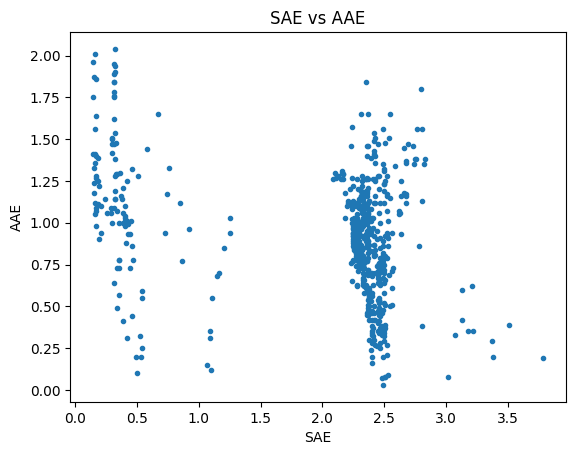

In [ ]:
plt.scatter(sae_aae['SAE'],sae_aae['AAE'], marker='.')
plt.xlabel("SAE")
plt.ylabel("AAE")
plt.title("SAE vs AAE")

Text(0.5, 1.0, 'AAE timeseries')

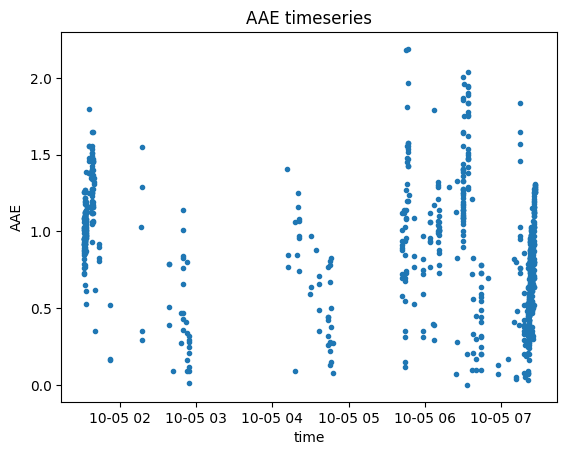

In [ ]:
plt.scatter(sae_aae['datetime'],sae_aae['AAE'],marker='.')
plt.xlabel("time")
plt.ylabel("AAE")
plt.title("AAE timeseries")

Text(0.5, 1.0, 'scattering timeseries')

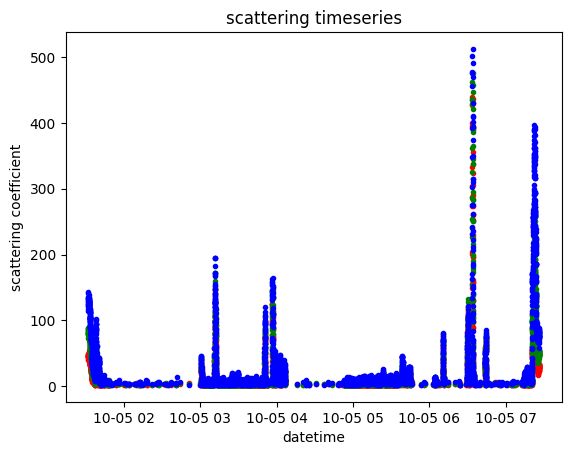

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(cleaned_df['datetime'],cleaned_df['scat_red'],marker='.',c='r')
ax1.scatter(cleaned_df['datetime'],cleaned_df['scat_green'],marker='.',c='g')
ax1.scatter(cleaned_df['datetime'],cleaned_df['scat_blue'],marker='.',c='b')
plt.xlabel("datetime")
plt.ylabel("scattering coefficient")
plt.title("scattering timeseries")

Text(0.5, 1.0, 'absorption timeseries')

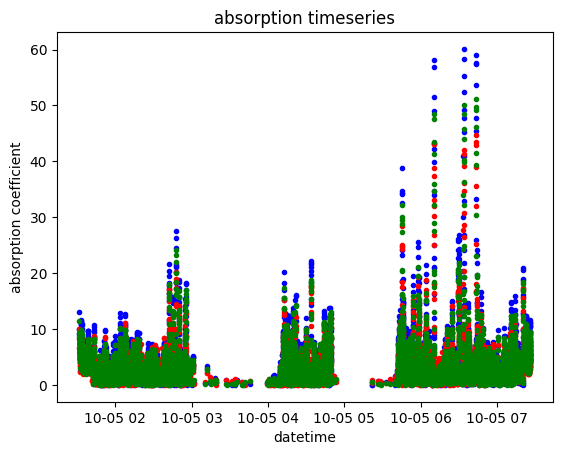

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(cleaned_df['datetime'],cleaned_df['abs_blue'],marker='.',c='b')
ax1.scatter(cleaned_df['datetime'],cleaned_df['abs_red'],marker='.',c='r')
ax1.scatter(cleaned_df['datetime'],cleaned_df['abs_green'],marker='.',c='g')
plt.xlabel("datetime")
plt.ylabel("absorption coefficient")
plt.title("absorption timeseries")

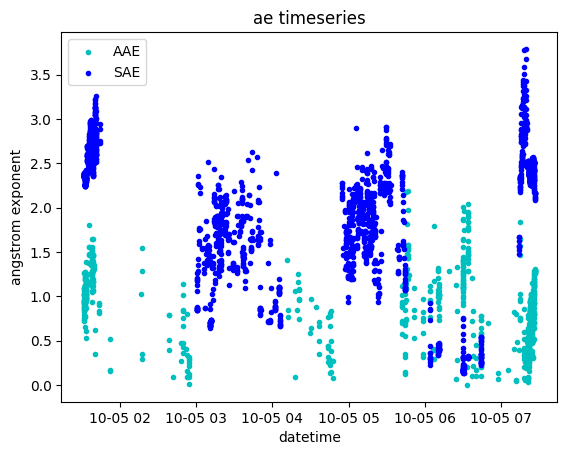

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(sae_aae['datetime'],cleaned_df['AAE'],marker='.',c='c')
ax1.scatter(sae_aae['datetime'],cleaned_df['SAE'],marker='.',c='b')
plt.xlabel("datetime")
plt.ylabel("angstrom exponent")
plt.title("ae timeseries")
plt.legend(labels=("AAE","SAE"))

In [ ]:
sae_aae_mask.to_csv('C:/Users/cphal/OneDrive/Desktop/Aerosols/Module C/sae_out.csv')